### Notebook based on 'A Complete Tutorial to Learn Data Science with Python from Scratch
#### Analytics Vidhya

Webpage stored locally [here](file:///C:/Users/danielle.leong/Desktop/sp.html): 

In [2]:
%pylab inline
# numpy as np
# matplotlib as plt
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv("C:/Users/danielle.leong/python/edu/train.csv") # reading from csv

In [4]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
df.describe()

C:\Users\danielle.leong\AppData\Local\Continuum\Anaconda3\Lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,NaN,NaN,NaN
50%,3812.500000,1188.500000,NaN,NaN,NaN
75%,5795.000000,2297.250000,NaN,NaN,NaN
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

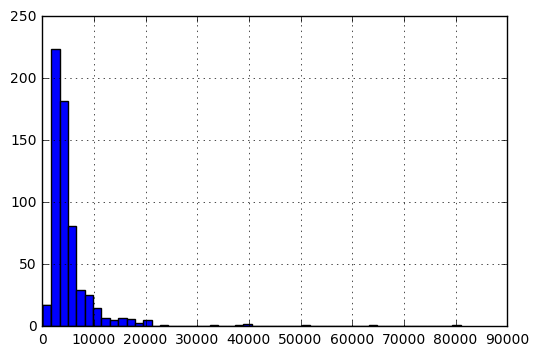

In [7]:
df['ApplicantIncome'].hist(bins=50) # histogram
# using 50 bins as std...?

C:\Users\danielle.leong\AppData\Local\Continuum\Anaconda3\Lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x8589fb0>],
 'caps': [<matplotlib.lines.Line2D at 0x8590d50>,
 'fliers': [<matplotlib.lines.Line2D at 0x8599bb0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x8599ad0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x8590350>,
  <matplotlib.lines.Line2D at 0x8590890>]}

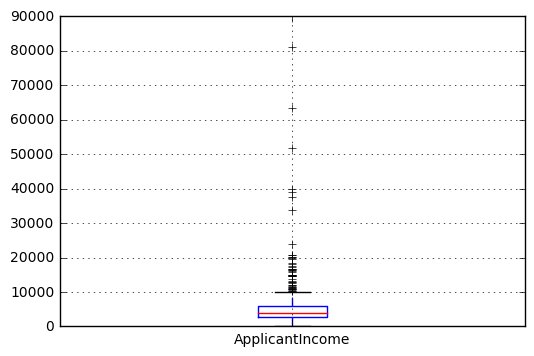

In [8]:
df.boxplot(column='ApplicantIncome') # box and whisker
# here outliers are indicated
# outliers shown based on distance in terms of interquartile range (IQR)

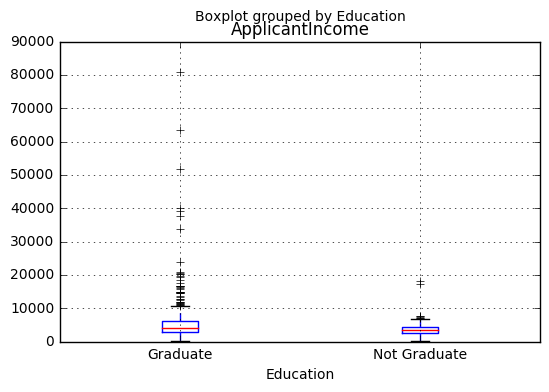

In [9]:
df.boxplot(column='ApplicantIncome', by = 'Education')

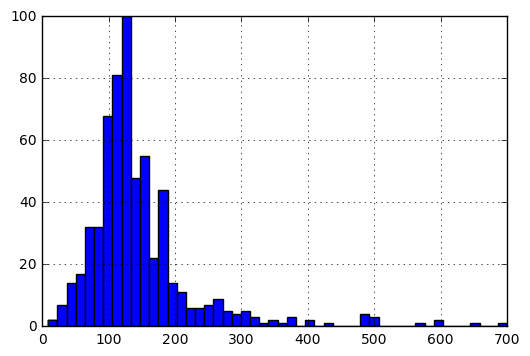

In [34]:
df['LoanAmount'].hist(bins=50)

C:\Users\danielle.leong\AppData\Local\Continuum\Anaconda3\Lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x8c02db0>],
 'caps': [<matplotlib.lines.Line2D at 0x8c09890>,
 'fliers': [<matplotlib.lines.Line2D at 0x8c0e6f0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x8c0e610>],
 'whiskers': [<matplotlib.lines.Line2D at 0x8c02f10>,
  <matplotlib.lines.Line2D at 0x8c09470>]}

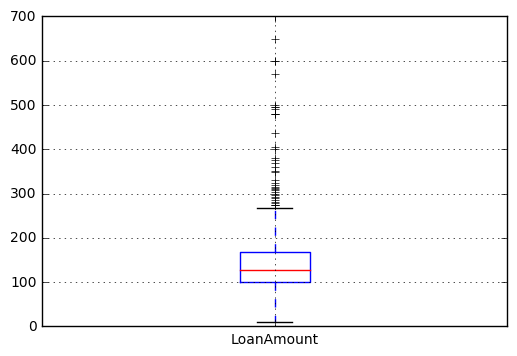

In [11]:
df.boxplot(column='LoanAmount')

The following cell will refer to [this](https://web.archive.org/web/20160509022507/http://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/) page, regarding methods for using Pandas module in python

An archived page is used due to inability to scroll on current site hosted (?) who knows why...

Anyhow, the goal is to create a pivot table like the one below, from excel:
![Alt text](https://www.analyticsvidhya.com/wp-content/uploads/2016/01/10.-pivot_table3.png)


The code snippet below refers to *lambda*, a short function construct that takes on expression.

Read more in Python 3.x documentation [here](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions)

In [12]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status', index=['Credit_History'], aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())

print('Frequency Table for Credit History:')
print(temp1)

print('\nProbability of getting loan for each Credit History class:')
print(temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting loan for each Credit History class:
Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64


A quick look at the [`aggfunc`](http://pandas.pydata.org/pandas-docs/version/0.18.1/generated/pandas.pivot_table.html) used here:
```python
aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())
```
Recall from earlier, the data in `Loan_Status` was composed of either a `Y` or an `N`. What `map()` is doing, is mapping those to boolean values.

Y => 1

N => 0




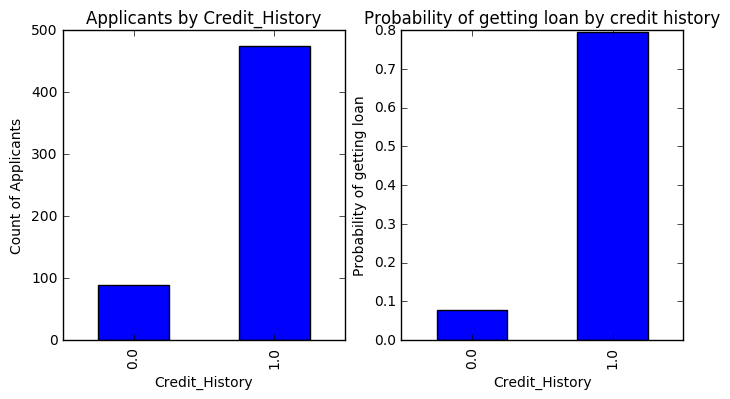

In [13]:
# import matplotlib.pyplot as plt --optional since we're already working in Pylab env.
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121) # see: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind = 'bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

Also I asked a question on stack overflow, located [here](http://stackoverflow.com/questions/41172448/why-wont-barchart-in-pandas-stack-different-values)

Suggestion from SO:

In [14]:
df['loan_status_word'] = df['Loan_Status'].map({'N':0, 'Y':1})
# must map x -> y, where x already exists
# counts = df['loan_status_word'].value_counts()
# counts

In [15]:
df['loanY'] = df['Loan_Status'].map({'N':0, 'Y':1})
df['loanN'] = df['Loan_Status'].map({'N':1, 'Y':0})

This was the original suggestion, was getting a error earlier but now it's gone somehow, probably a typo????

...or maybe I didn't run my entire file first...also I changed the `aggfunc` to `sum`

In [16]:
df.pivot_table(values=['loanY', 'loanN'], 
               index=['Credit_History', 'Gender'], 
               columns = 'Loan_Status', 
               aggfunc = 'size')

Loan_Status             N    Y
Credit_History Gender         
0.0            Female  16    1
               Male    63    6
1.0            Female  20   64
               Male    75  307

In [17]:
df['loan_status_word'] = df['Loan_Status'].map({'N':1, 'Y':1})

In [18]:
pvt2 = df.pivot_table(values='loan_status_word', 
               index=['Credit_History', 'Gender'], 
               columns = 'Loan_Status', 
               aggfunc = 'sum')

In [19]:
ndim(df['loan_status_word'])

1

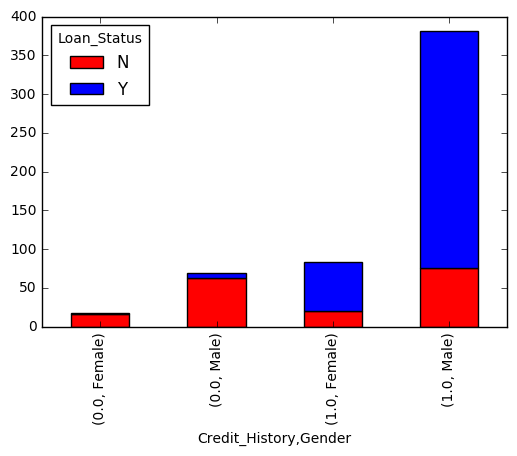

In [20]:
pvt2.plot(kind = 'bar', stacked = True, color = ['red', 'blue'], grid = False)


# Data munging with Pandas
### Methods for filling missing values

Note: general methods, not based on learning model

In [21]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

### A note on possible methods
Here's an example of what can be done, plus my stupid notes.
```python
# THE MISSING VALUES CELL
# maybe I shouldn't run this...at all
# To fill by mean:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace = True)
# causes an error in below cell--nono, actually something else is messing it up
# no no actually everything is fine up until problem cell
```

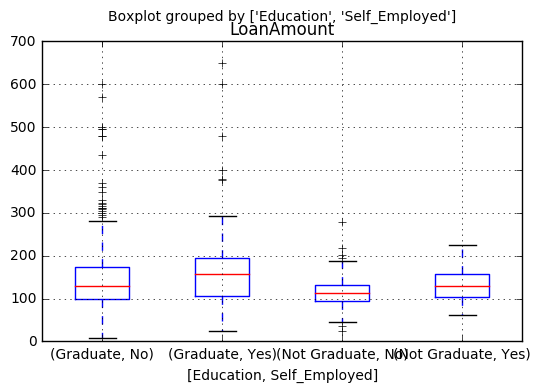

In [22]:
df.boxplot(column = 'LoanAmount', by = ['Education', 'Self_Employed'])
# did this based on seeing figure from site

In [23]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [24]:
# most values are no (86%) ergo with high likelihood it can be said the missing are 'No'
df['Self_Employed'].fillna('No', inplace = True)

In [25]:
table = df.pivot_table(values = 'LoanAmount',
                      index = 'Self_Employed',
                      columns = 'Education',
                      aggfunc = np.median)
table

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


In [26]:
# returns values of pivot table
def fage(x): 
    return table.loc[x['Self_Employed'], x['Education']]
# to replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis = 1), inplace = True)

# ~~The PROBLEM CELL~~
Maybe I should be running this *INSTEAD* of the missing values cell
```python
# to replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis = 1), inplace = True)
```

->> Conclusion, yes, that ***is*** the problem

**Also** be sure to run all the cells preceding this cell

A quick breakdown: 
- Working with the 'LoanAmount' col of df
- filling in the na values
  - looking at the spots in df where there are nan vals in the 'LoanAmount' col
  - returning the following table (run cell below to see)
    - `table.loc[df['Self_Employed'], df['Education']]`
      - indexing by label
      - creates table with all values for 'Self_Employed' and all vals for 'Education' along index and cols respectively
      - intersections indicate values, based on original table
  - `inplace = True` directly modifying obj

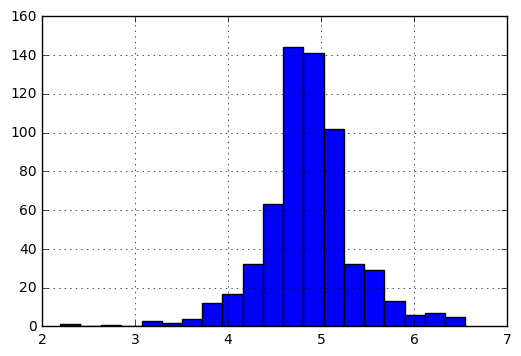

In [27]:
# log transformation to reduce effect of extreme values as much as possible
# natural log
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

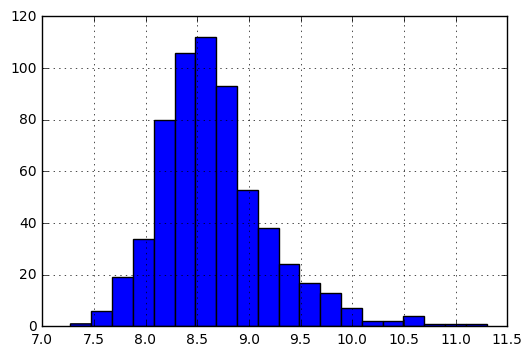

In [32]:
# combining applicant income and coapplicant income
# since some have low income but strong coapplicants
# >> total income
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [29]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [37]:
# ~81% are male, ergo we can say it is likely the missing applicants are male
# the 13 missing values are ~2% of the entire set, so there isn't a large concern on its effect
df['Gender'].fillna(value = 'Male', inplace=True)
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64